In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the data
data = pd.read_csv('loan.csv')

# Display basic information
print("Dataset Shape:", data.shape)
data.head()
print(data.info())



Dataset Shape: (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


/var/folders/lw/v25mn9yn66l_wlzw7b5xzss80000gq/T/ipykernel_50367/3571799021.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


In [48]:
# Data Cleaning
# Convert interest rate and revolving utilization to numeric
data['int_rate'] = data['int_rate'].str.replace('%', '', regex=False).astype(float)
data['revol_util'] = data['revol_util'].str.replace('%', '', regex=False).astype(float)


In [92]:
# Handle categorical missing values if any
data['home_ownership'] = data['home_ownership'].fillna(data['home_ownership'].mode()[0])


In [94]:
# Describe data to check for outliers or extreme values
print("\nSummary statistics of numerical columns:")
print(data.describe())



Summary statistics of numerical columns:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment    emp_length  \
count     39717.000000  39717.000000  39717.000000  39717.000000   
mean      10397.448868     12.021177    324.561922      4.954226   
std        7128.450439      3.724825    208.874874      3.461960   
min           0.000000      5.420000     15.690000      0.000000   
25%        5000.000000      9.25

In [96]:
# Outliers detection (e.g., using IQR for 'annual_inc')
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_cleaned = data[(data['annual_inc'] >= lower_bound) & (data['annual_inc'] <= upper_bound)]

# Check cleaned data statistics
print("\nSummary statistics after removing outliers:")
print(data_cleaned.describe())


Summary statistics after removing outliers:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.787400e+04  3.787400e+04  37874.000000  37874.000000   
mean   6.826765e+05  8.499732e+05  10869.161562  10614.453187   
std    2.106181e+05  2.655710e+05   7174.041656   6915.992065   
min    5.473400e+04  7.472400e+04    500.000000    500.000000   
25%    5.162425e+05  6.668985e+05   5100.000000   5000.000000   
50%    6.644305e+05  8.493725e+05   9600.000000   9250.000000   
75%    8.368758e+05  1.046444e+06  15000.000000  14700.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment    emp_length  \
count     37874.000000  37874.000000  37874.000000  37874.000000   
mean      10081.398689     11.974104    314.532940      4.912605   
std        6854.151680      3.698902    200.087403      3.452155   
min           0.000000      5.420000     15.690000      0.000000   
25%        5000.000000      8

In [52]:
# Handle missing values
# Handle missing values
data['annual_inc'] = data['annual_inc'].fillna(data['annual_inc'].median())
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())


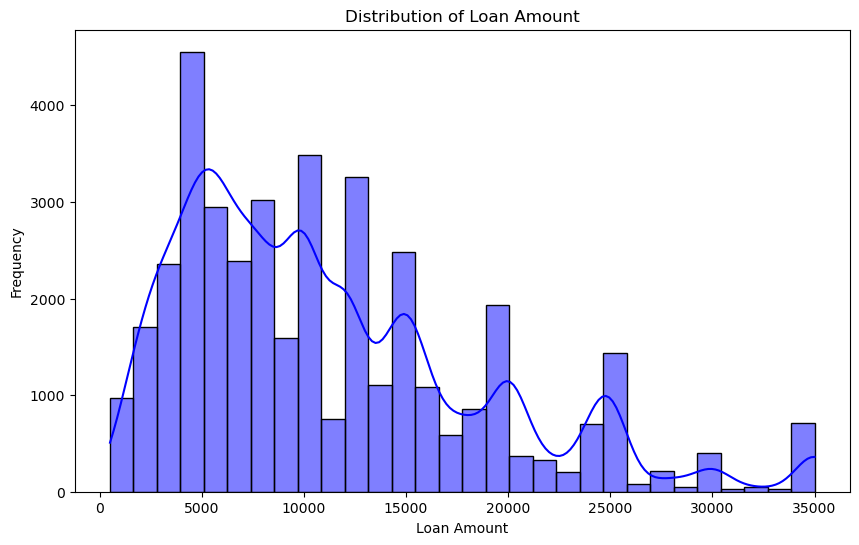

In [54]:
# Univariate Analysis: Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

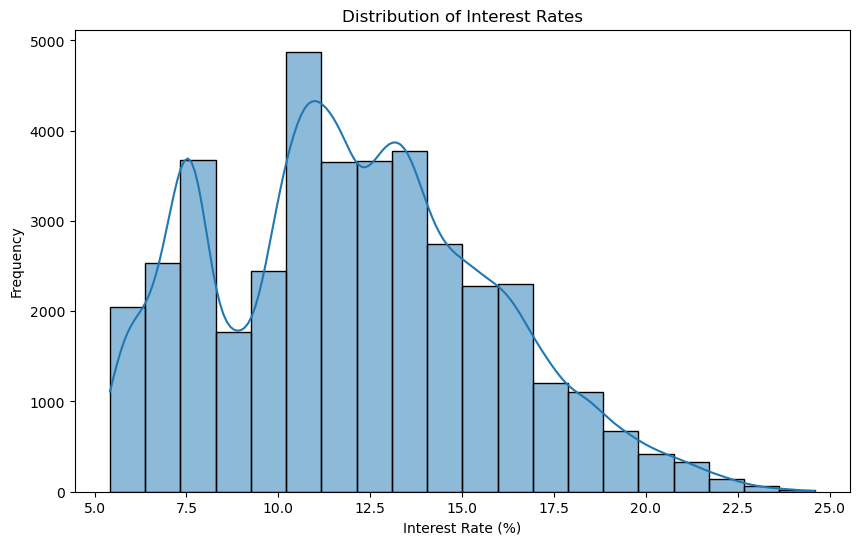

In [76]:
# Univariate Analysis
## Distribution of Interest Rates
plt.figure(figsize=(10, 6))
sns.histplot(data['int_rate'], bins=20, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

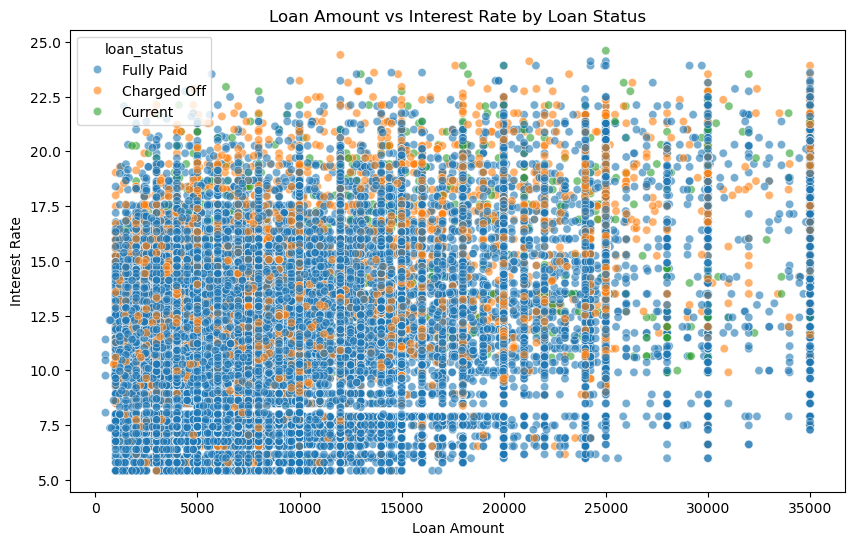

In [56]:
# Bivariate Analysis: Loan Amount vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status', alpha=0.6)
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


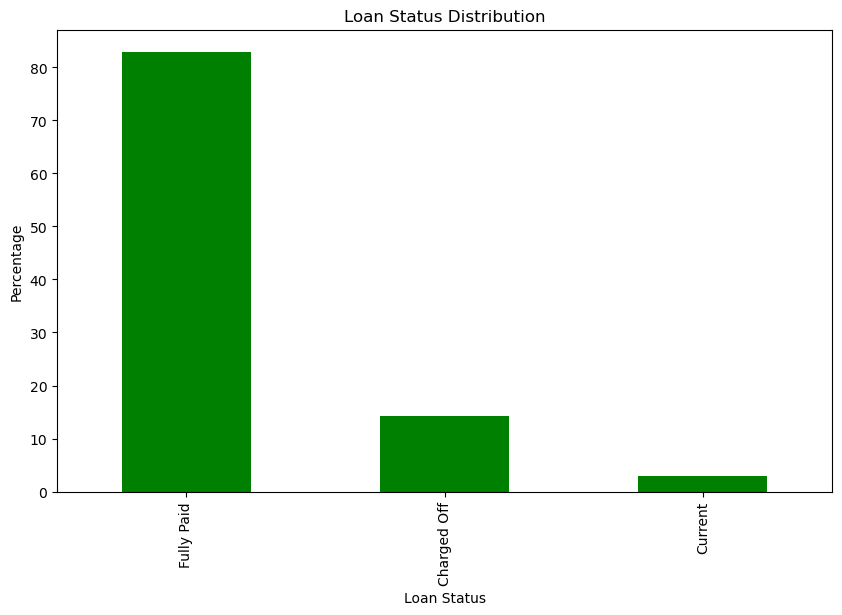

In [58]:
# Loan Status Analysis
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar', color='green')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

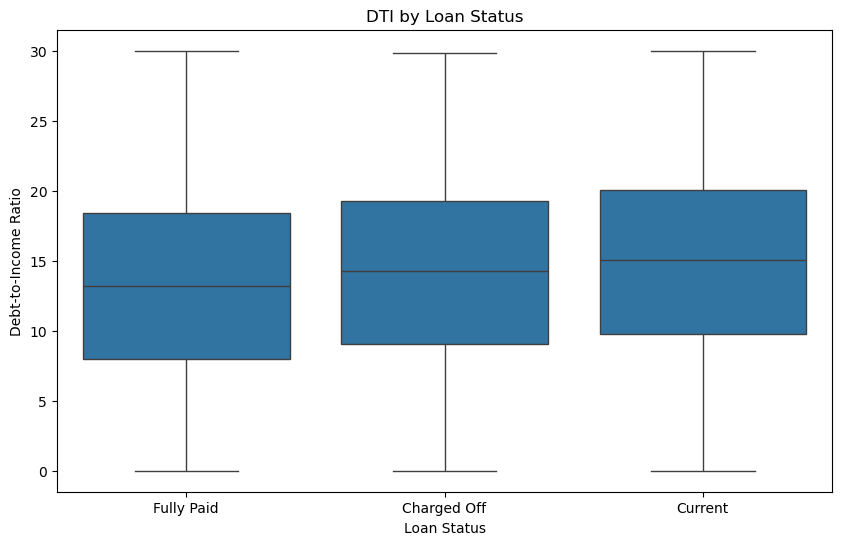

In [60]:
# Debt-to-Income (DTI) Ratio Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=data)
plt.title('DTI by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

In [64]:
# Check for duplicates and remove if any
data = data.drop_duplicates()

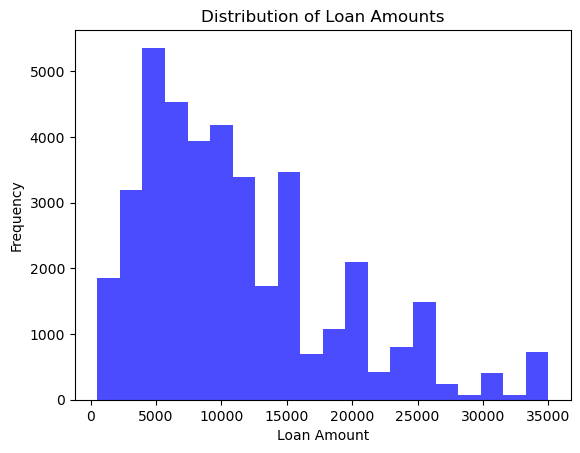

In [66]:
# Distribution of loan amounts
plt.hist(data['loan_amnt'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

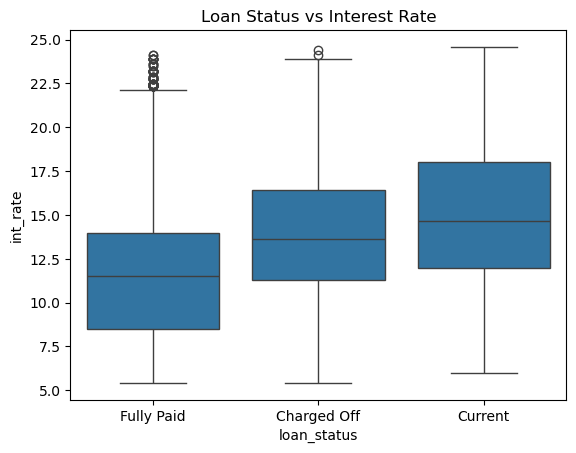

In [70]:
# Relationship between loan status and interest rate
sns.boxplot(x='loan_status', y='int_rate', data=data)
plt.title('Loan Status vs Interest Rate')
plt.show()

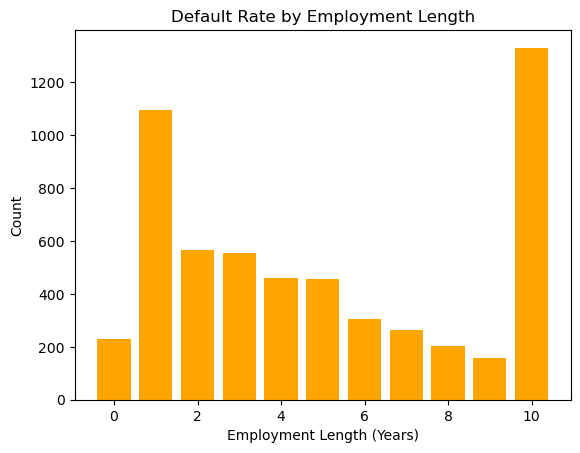

In [72]:
# Default rates by employment length
default_rate = data[data['loan_status'] == 'Charged Off'].groupby('emp_length').size()
plt.bar(default_rate.index, default_rate.values, color='orange')
plt.title('Default Rate by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')
plt.show()

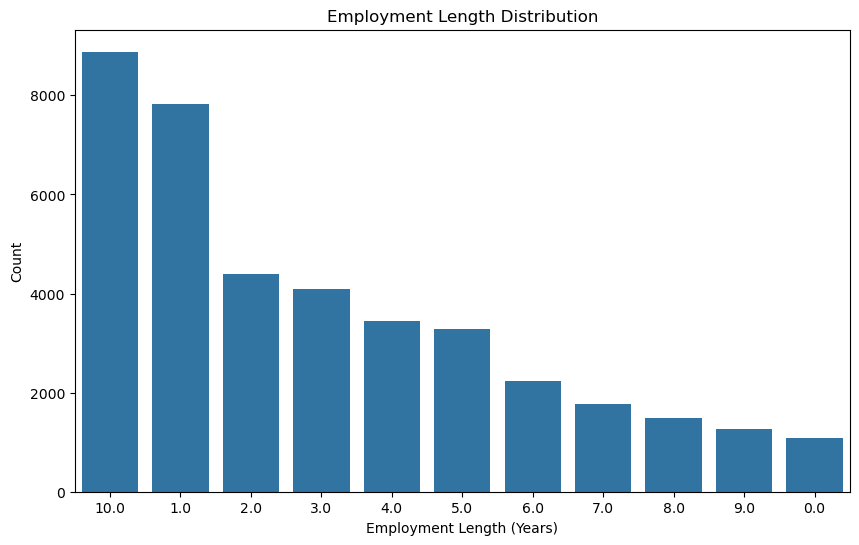

In [78]:
# Employment Length Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=data, order=data['emp_length'].value_counts().index)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')
plt.show()

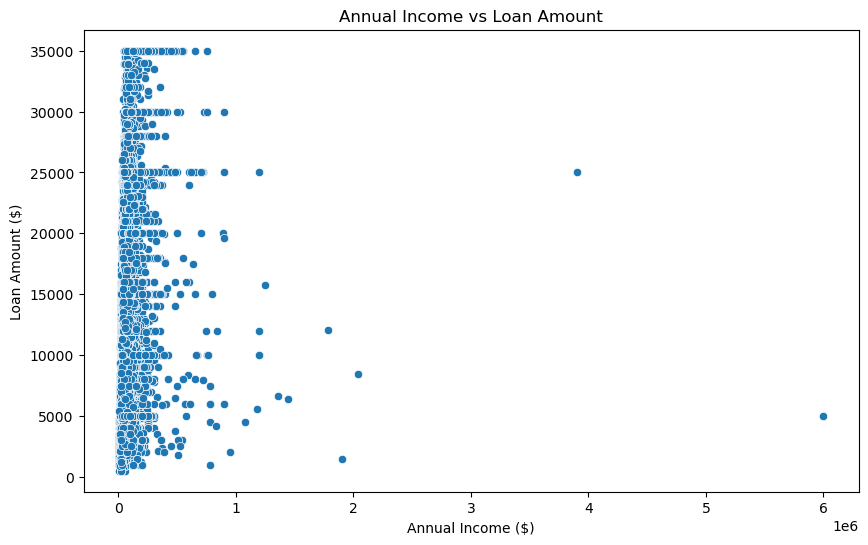

In [82]:
## Annual Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=data)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.show()

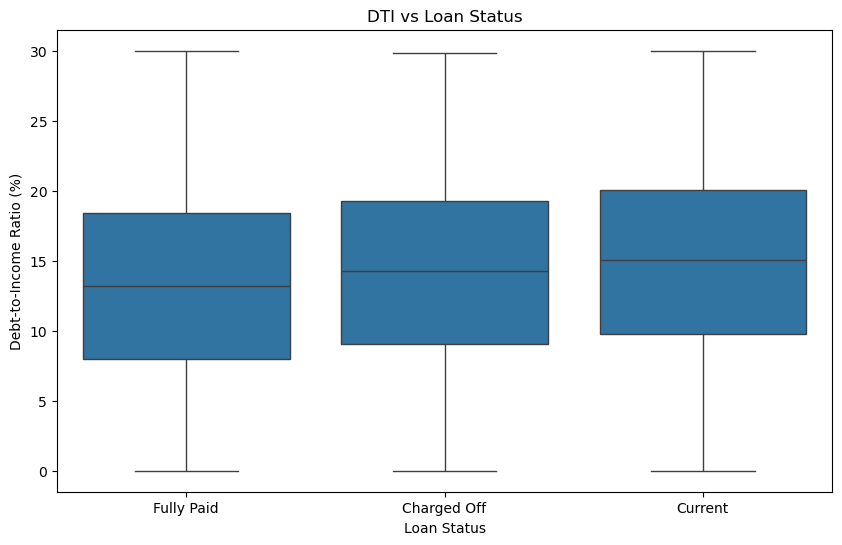

In [84]:
## Debt-to-Income Ratio vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=data)
plt.title('DTI vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.show()

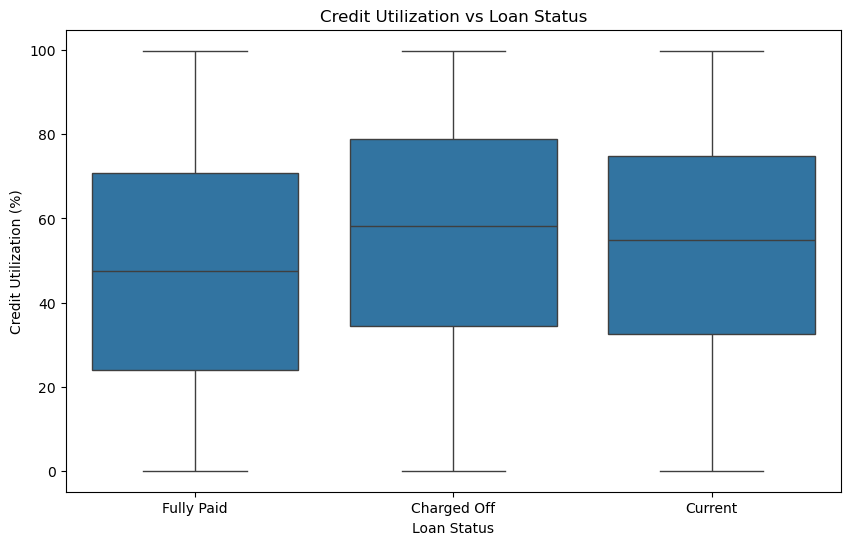

In [86]:
## Credit Utilization vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=data)
plt.title('Credit Utilization vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Utilization (%)')
plt.show()

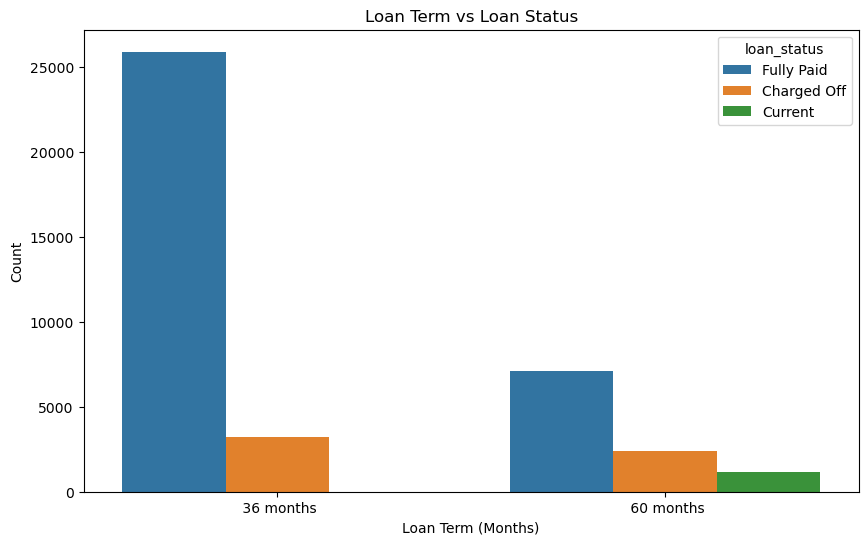

In [88]:
## Loan Term vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=data)
plt.title('Loan Term vs Loan Status')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.show()

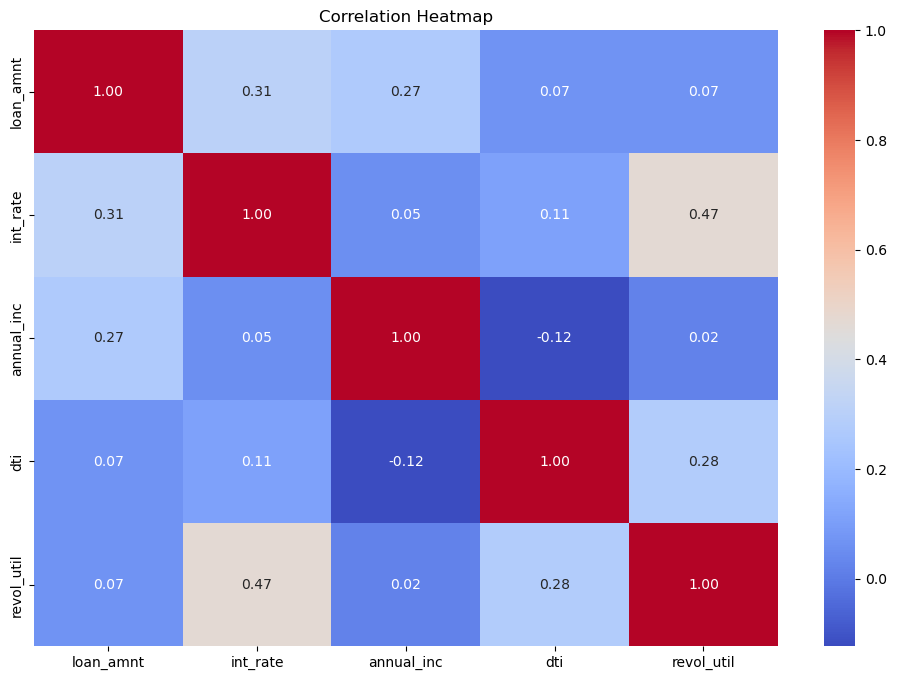

In [90]:
# Additional Visualizations
## Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
